In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

newdf = pd.read_excel('Volve production data.xlsx')

In [2]:
#Roundinf off the data to the nearest integer
newdf = np.round(newdf)
#print(newdf)

In [3]:
#print(newdf.info())
#print(newdf.var())

In [4]:
#Data is highly skewed and depends on the well,hence i have used padding to fill the missing values 
newdf['ON_STREAM_HRS'] = newdf['ON_STREAM_HRS'].fillna(method='pad')

newdf['AVG_DOWNHOLE_PRESSURE'] = newdf['AVG_DOWNHOLE_PRESSURE'].fillna(method='pad')

newdf['AVG_DOWNHOLE_TEMPERATURE'] = newdf['AVG_DOWNHOLE_TEMPERATURE'].fillna(method='pad')

newdf['AVG_DP_TUBING'] = newdf['AVG_DP_TUBING'].fillna(method='pad')

newdf['AVG_ANNULUS_PRESS'] = newdf['AVG_ANNULUS_PRESS'].fillna(method='pad')

newdf['AVG_CHOKE_SIZE_P'] = newdf['AVG_CHOKE_SIZE_P'].fillna(method='pad')

newdf['AVG_WHP_P'] = newdf['AVG_WHP_P'].fillna(method='pad')

newdf['AVG_WHT_P'] = newdf['AVG_WHT_P'].fillna(method='pad')

newdf['DP_CHOKE_SIZE'] = newdf['DP_CHOKE_SIZE'].fillna(method='pad')

newdf['BORE_OIL_VOL'] = newdf['BORE_OIL_VOL'].fillna(method='pad')

newdf['BORE_GAS_VOL'] = newdf['BORE_GAS_VOL'].fillna(method='pad')

newdf['BORE_WAT_VOL'] = newdf['BORE_WAT_VOL'].fillna(method='pad')


In [5]:
#print(newdf.info())

In [6]:
#Carrying out dimensionality reduction on the original dataframe
#Dropping unnecessary features: WELL_BORE_CODE, NPD_WELL_BORE_NAME, NPD_FIELD_NAME, NPD_FIELD_CODE,NPD_FACILITY_CODE,NPD_FACILITY_NAME

to_drop = ["WELL_BORE_CODE", "NPD_WELL_BORE_NAME", "NPD_FIELD_NAME", "NPD_FIELD_CODE", "NPD_FACILITY_CODE", "NPD_FACILITY_NAME","AVG_DOWNHOLE_PRESSURE", "AVG_DP_TUBING","BORE_WI_VOL","AVG_CHOKE_UOM","FLOW_KIND","WELL_TYPE","BORE_GAS_VOL"]
newdf = newdf.drop(to_drop, axis=1)
#print(newdf.info())

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#newdf_scaled = pd.DataFrame('ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P','BORE_GAS_VOL')

newdf[['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE']] = scaler.fit_transform(newdf[['ON_STREAM_HRS', 'AVG_DOWNHOLE_TEMPERATURE']])

newdf[['AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P']] = scaler.fit_transform(newdf[['AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P']])

newdf[['AVG_WHP_P','AVG_WHT_P']] = scaler.fit_transform(newdf[['AVG_WHP_P', 'AVG_WHT_P']])

#newdf[['BORE_OIL_VOL','BORE_WAT_VOL']] = scaler.fit_transform(newdf[[ 'BORE_OIL_VOL','BORE_WAT_VOL']])


#Taking the data of wells 2 to 4 since they were the ones with the east number of missing values
fdf = newdf.loc[746 : 8022]

X = fdf.drop(['BORE_OIL_VOL'],axis=1)
y= fdf[['BORE_OIL_VOL','NPD_WELL_BORE_CODE']]

#Applying Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

reg_all = LinearRegression()

In [8]:
x_train_final = X_train.drop(['DATEPRD','NPD_WELL_BORE_CODE'],axis = 1)
x_test_final = X_test.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

In [9]:
y_test_final = y_test['BORE_OIL_VOL']
y_train_final = y_train['BORE_OIL_VOL']

In [10]:
X = fdf.drop(['DATEPRD','BORE_OIL_VOL'],axis=1).values
y= fdf['BORE_OIL_VOL']

In [11]:
reg_all.fit(x_train_final, y_train_final)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred = reg_all.predict(x_test_final)

In [13]:
reg_all.score(x_test_final, y_test_final)

0.5542109655694217

In [14]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(reg_all, X, y, cv=5)

print(cv_results)

np.mean(cv_results)

[-8.91611528e+01  1.05299896e-02 -4.95317645e+01  5.67357115e-01
 -3.22706905e+01]


-34.07714412518652

In [15]:
# Applying Ridge Regression

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, normalize=True)

ridge.fit(x_train_final, y_train_final)

ridge_pred = ridge.predict(x_test_final)

ridge.score(x_test_final, y_test_final)

0.5452640363101314

In [16]:
X_test.groupby(['NPD_WELL_BORE_CODE']).agg({"DATEPRD":"count"})

,DATEPRD
NPD_WELL_BORE_CODE,
5351,910
5599,914
7078,360


C:\Users\Jayesh\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


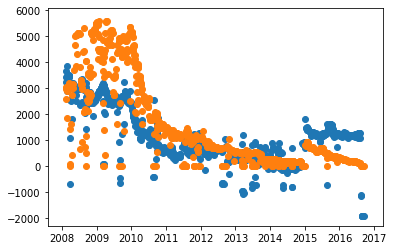

In [17]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

X_test_5599

y_pred = reg_all.predict(x_test_5599final)

plt.scatter(X_test_5599["DATEPRD"],y_pred)
plt.scatter(X_test_5599["DATEPRD"],y_test_5599['BORE_OIL_VOL'])

In [21]:
from sklearn import svm 
clf = svm.SVC(kernel = 'rbf')  # kernel = gaussian,vanilla dot,rbf..........rbf has best accuracy
clf.fit(x_train_final,y_train_final)
y_pred_svm = clf.predict(x_test_final)

C:\Users\Jayesh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
print(clf.score(x_test_final, y_test_final))

0.0924908424908425


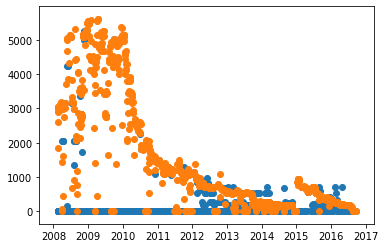

In [23]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)



y_pred = clf.predict(x_test_5599final)

plt.scatter(X_test_5599["DATEPRD"],y_pred)
plt.scatter(X_test_5599["DATEPRD"],y_test_5599['BORE_OIL_VOL'])

In [24]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg1.fit(x_train_final,y_train_final)
reg2.fit(x_train_final,y_train_final)
print(reg1.score(x_test_final, y_test_final))
print(reg2.score(x_test_final, y_test_final))


C:\Users\Jayesh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9613482977039688
0.9806197046541312


In [26]:
from sklearn.tree import DecisionTreeRegressor
modell = DecisionTreeRegressor()
modell.fit(x_train_final, y_train_final)
print(modell.score(x_test_final, y_test_final))

0.972530607862336


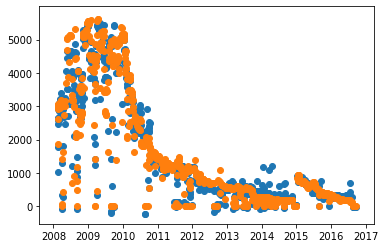

In [27]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)



y_pred = reg1.predict(x_test_5599final)

plt.scatter(X_test_5599["DATEPRD"],y_pred)
plt.scatter(X_test_5599["DATEPRD"],y_test_5599['BORE_OIL_VOL'])

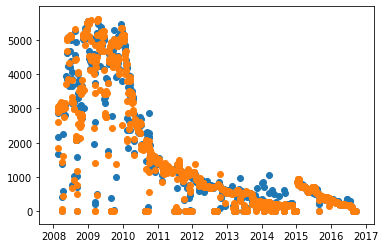

In [28]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)



y_pred = reg2.predict(x_test_5599final)

plt.scatter(X_test_5599["DATEPRD"],y_pred)
plt.scatter(X_test_5599["DATEPRD"],y_test_5599['BORE_OIL_VOL'])

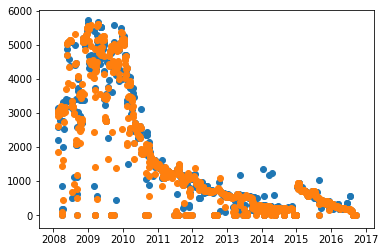

In [29]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)



y_pred = modell.predict(x_test_5599final)

plt.scatter(X_test_5599["DATEPRD"],y_pred)
plt.scatter(X_test_5599["DATEPRD"],y_test_5599['BORE_OIL_VOL'])

In [ ]:
from sklearn import svm 
clf = svm.SVC(kernel = 'poly')  # kernel = gaussian,vanilla dot,rbf..........rbf has best accuracy
clf.fit(x_train_final,y_train_final)
y_pred_svm = clf.predict(x_test_final)

C:\Users\Jayesh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
